In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [44]:
df = pd.read_csv('D:\\Acads\\Fall 19\\ADM\\Project\\mercari-price-suggestion-challenge\\train.tsv', sep='\t')
df.drop(columns='train_id', inplace=True)


In [7]:
# How many null values rows are there
pd.isnull(df).sum()

name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

#### There are 6327 null rows in category_name column. 632682 items don't have any brand name

In [8]:
# Total number of category types
len(df.category_name.value_counts(dropna=False))

1288

In [9]:
# Top 20 categories
df.category_name.value_counts(dropna=False)[:20]

Women/Athletic Apparel/Pants, Tights, Leggings                 60177
Women/Tops & Blouses/T-Shirts                                  46380
Beauty/Makeup/Face                                             34335
Beauty/Makeup/Lips                                             29910
Electronics/Video Games & Consoles/Games                       26557
Beauty/Makeup/Eyes                                             25215
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    24676
Women/Underwear/Bras                                           21274
Women/Tops & Blouses/Tank, Cami                                20284
Women/Tops & Blouses/Blouse                                    20284
Women/Dresses/Above Knee, Mini                                 20082
Women/Jewelry/Necklaces                                        19758
Women/Athletic Apparel/Shorts                                  19528
Beauty/Makeup/Makeup Palettes                                  19103
Women/Shoes/Boots                 

##### We can see that there is a primary category of items (Women, Beauty, Electronics, Men, etc) followed by a sub category followed by another sub category. The subcategories are separated using a '/'.

In [10]:
# Total number of brand names
len(df.brand_name.value_counts(dropna=False))

4810

In [11]:
# Top 20 brand names
df.brand_name.value_counts()[:20]

PINK                 54088
Nike                 54043
Victoria's Secret    48036
LuLaRoe              31024
Apple                17322
FOREVER 21           15186
Nintendo             15007
Lululemon            14558
Michael Kors         13928
American Eagle       13254
Rae Dunn             12305
Sephora              12172
Coach                10463
Disney               10360
Bath & Body Works    10354
Adidas               10202
Funko                 9237
Under Armour          8461
Sony                  7994
Old Navy              7567
Name: brand_name, dtype: int64

#### Let's take a look at our target variable

In [12]:
df.price.describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

##### 75% of the items lie within $30. However, There are some outliers.

In [13]:
len(df[df.price > 30])

342739

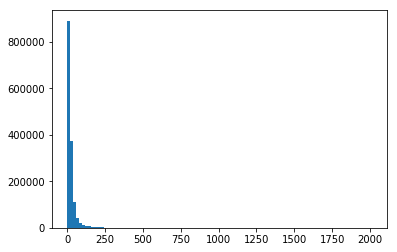

In [14]:
plt.hist(df.price, bins = 100)
plt.show()

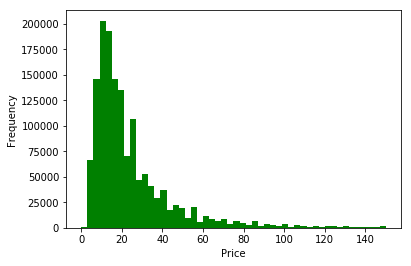

In [15]:
plt.hist(df.price, bins = 50, range=[0,150], color='g')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

##### the price is not in a normal form and some of the items have zero price. Hence, I am adding 1 to each item's price. This would help us in plotting the price on a log scale.

In [16]:
df.price = df.price + 1

In [17]:
sample = np.log10(df.price)

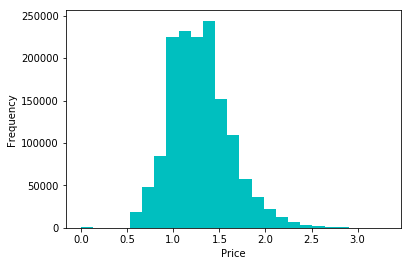

In [18]:
plt.hist(sample, bins = 25, color='c')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


##### We saw earlier that category of the item follows a hierarchy of the form primary_category/subcategory1/subcategory2.   I will now make 3 new columns to separate this information.

In [27]:
df.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [29]:
# Filling empty rows of category column with '//'
df.category_name.fillna('Other/Other/Other', inplace=True)

In [30]:
# Creating three new columns to separate the categories 
df['primary_category'] = df.category_name.apply(lambda cat:cat.split('/')[0].strip())
df['sub_category1'] = df.category_name.apply(lambda cat:cat.split('/')[1].strip())
df['sub_category2'] = df.category_name.apply(lambda cat:cat.split('/')[2].strip())

In [31]:
df.category_name = df.category_name.apply(lambda cat: ' '.join(cat.split('/')).strip())

In [32]:
df

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,primary_category,sub_category1,sub_category2
0,MLB Cincinnati Reds T Shirt Size XL,3,Men Tops T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,Razer BlackWidow Chroma Keyboard,3,Electronics Computers & Tablets Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,AVA-VIV Blouse,1,Women Tops & Blouses Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,Leather Horse Statues,1,Home Home Décor Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,24K GOLD plated rose,1,Women Jewelry Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces
5,Bundled items requested for Ruie,3,Women Other Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma...",Women,Other,Other
6,Acacia pacific tides santorini top,3,Women Swimwear Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...,Women,Swimwear,Two-Piece
7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors Apparel Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...,Sports & Outdoors,Apparel,Girls
8,Girls Nike Pro shorts,3,Sports & Outdoors Apparel Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.,Sports & Outdoors,Apparel,Girls
9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles Collectibles Doll,NaN,8.0,0,I realized his pants are on backwards after th...,Vintage & Collectibles,Collectibles,Doll


#### Handling Missing Data

In [33]:
pd.isnull(df).sum()

name                      0
item_condition_id         0
category_name             0
brand_name           632682
price                     0
shipping                  0
item_description          4
primary_category          0
sub_category1             0
sub_category2             0
dtype: int64

In [ ]:
# def handleMissingData(df):
#     df['brand_name'].fillna(value='unknown', inplace=True)
#     df[]

6327

0                             Men
1                     Electronics
2                           Women
3                            Home
4                           Women
5                           Women
6                           Women
7               Sports & Outdoors
8               Sports & Outdoors
9          Vintage & Collectibles
10                         Beauty
11                         Beauty
12                          Women
13                          Other
14                          Women
15                         Beauty
16                         Beauty
17                           Kids
18                         Beauty
19                          Women
20                          Women
21                          Women
22                    Electronics
23                    Electronics
24                          Women
25                            Men
26                    Electronics
27                          Women
28                          Women
29            

In [25]:
pd.isnull(df).sum()

name                      0
item_condition_id         0
category_name             0
brand_name           632682
price                     0
shipping                  0
item_description          4
primary_category          0
sub_category1             0
sub_category2             0
dtype: int64

##### The null values in category columns are filled as  ' '

In [39]:
df.primary_category.value_counts()

Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
                            6327
Name: primary_category, dtype: int64

In [35]:
df.primary_category.value_counts().index[10]

''

In [37]:
len(df.sub_category1.value_counts())

114

There are 114 types of sub category 1

In [38]:
len(df.sub_category2.value_counts())

871

In [44]:
df.sub_category1.value_counts()

Athletic Apparel             134383
Makeup                       124624
Tops & Blouses               106960
Shoes                        100452
Jewelry                       61763
Toys                          58158
Cell Phones & Accessories     53290
Women's Handbags              45862
Dresses                       45758
Women's Accessories           42350
Jeans                         36130
Video Games & Consoles        35971
Sweaters                      35752
Underwear                     33784
Skin Care                     29838
Home Décor                    25188
Fragrance                     24294
Kitchen & Dining              21954
Tops                          20591
Other                         20017
Swimwear                      18924
Men's Accessories             18672
Girls 2T-5T                   18448
Coats & Jackets               18391
Girls 0-24 Mos                17878
Boys 0-24 Mos                 15372
Girls (4+)                    15243
Boys (4+)                   